In [22]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [23]:
data = pd.read_csv("heart.csv", delimiter=',')
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [25]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [26]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression


In [28]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



# Naive Bayes

In [29]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



# Random Forest Classfier

In [30]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



# Extreme Gradient Boost

In [31]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 84  14]
 [  3 104]]


Accuracy of Extreme Gradient Boost: 91.70731707317074 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        98
           1       0.88      0.97      0.92       107

    accuracy                           0.92       205
   macro avg       0.92      0.91      0.92       205
weighted avg       0.92      0.92      0.92       205



# K-NeighborsClassifier

In [32]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



# DecisionTreeClassifier

In [33]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



# Support Vector Classifier

In [34]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
print(svc_predicted)
print(y_test)

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

[1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]
807    1
27     0
77     0
406    1
886    0
      ..
877    1
320    1
362    1
452    0
500    1
Name: target, Length: 205, dtype: int64


In [35]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "heartDiseaseML.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model_pkl_file, file)


In [36]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# Importace of Features

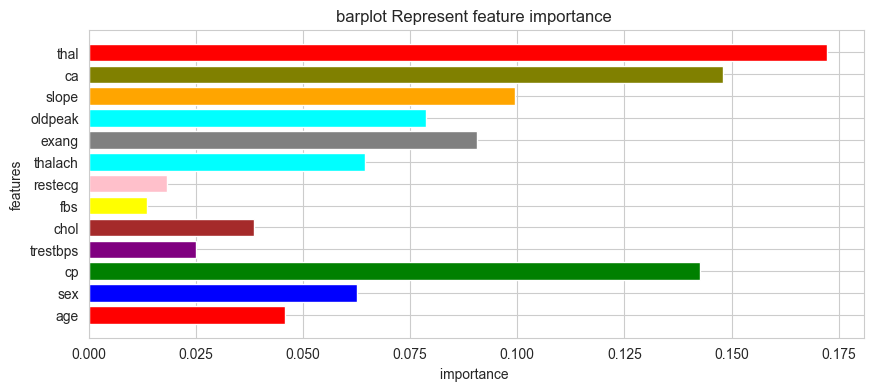

In [37]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
colors = ['red', 'blue', 'green', 'purple', 'brown', 'yellow', 'pink', 'aqua', 'grey', 'cyan', "orange", 'olive']

plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

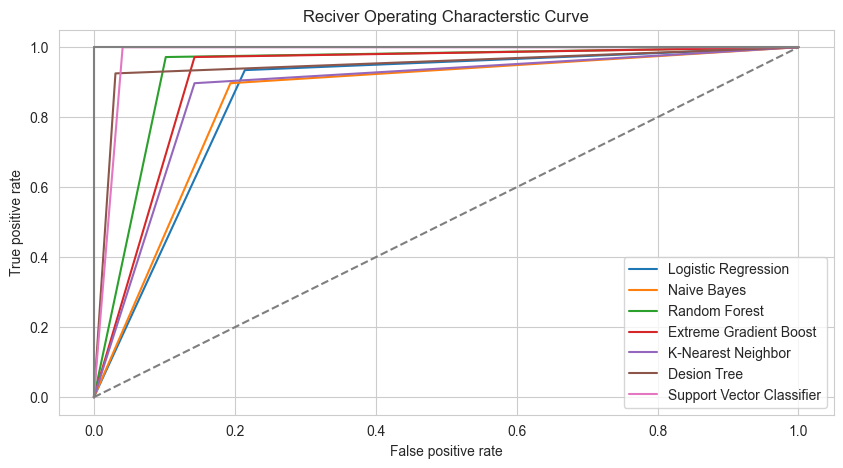

In [38]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Models

In [39]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.341463
1,Naive Bayes,85.365854
2,Random Forest,93.658537
3,Extreme Gradient Boost,91.707317
4,K-Nearest Neighbour,87.804878
5,Decision Tree,94.634146
6,Support Vector Machine,98.048780


# Accuracy of different models

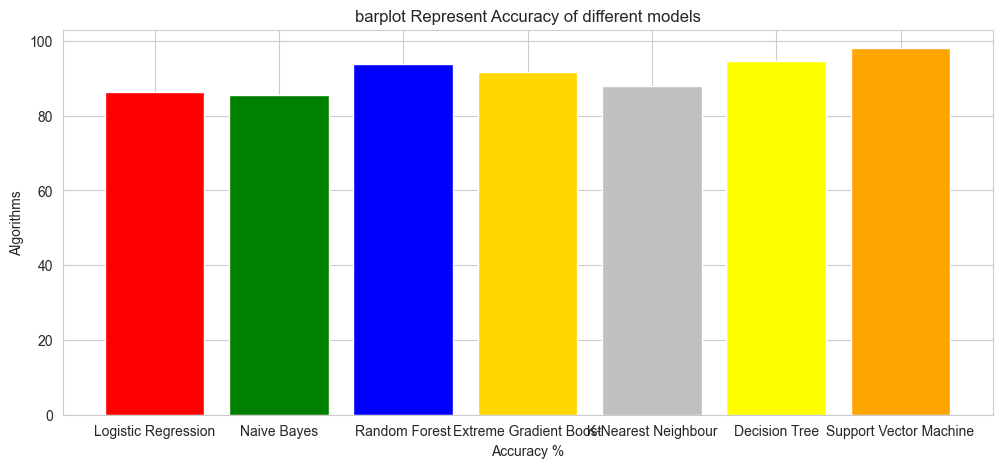

In [40]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [41]:
import telebot
import pickle  # if your model is saved as .pkl
import numpy as np

# Initialize bot
bot = telebot.TeleBot("7156297570:AAH0nNSPBHzewAMGx-XYSic0l_UZgz88zvs", parse_mode=None)

# Temporary user state
user_states = {}

# Features in order
features = ['age', 'sex', 'chest pain type (4 values)', 'resting blood pressure', 'serum cholestoral in mg/dl', 'fasting blood sugar > 120 mg/dl', 'resting electrocardiographic results (values 0,1,2)',
            'maximum heart rate achieved', 'exercise induced angina', 'oldpeak = ST depression induced by exercise relative to rest', 'the slope of the peak exercise ST segment', 'number of major vessels (0-3) colored by flourosopy', 'thal: 0 = normal; 1 = fixed defect; 2 = reversable defect']

@bot.message_handler(commands=['start'])
def welcome(message):
    bot.reply_to(message, "👋 Hey! Type /predict to begin the health prediction test.")

@bot.message_handler(commands=['predict'])
def start_prediction(message):
    user_id = message.chat.id
    user_states[user_id] = {'step': 0, 'data': []}
    bot.send_message(user_id, f"Enter value for {features[0]}:")

@bot.message_handler(func=lambda m: m.chat.id in user_states)
def collect_data(message):
    user_id = message.chat.id
    state = user_states[user_id]
    
    try:
        val = float(message.text)
    except ValueError:
        bot.send_message(user_id, "❌ Please enter a valid number.")
        return

    state['data'].append(val)
    state['step'] += 1

    if state['step'] < len(features):
        bot.send_message(user_id, f"Enter value for {features[state['step']]}:")
    else:
        # All inputs received, make prediction
        input_data = np.array([state['data']])
        prediction = svc.predict(input_data)[0]
        print(prediction)
        result = "🟢 No heart disease risk detected." if prediction != 1 else "🔴 Risk of heart disease detected."
        bot.send_message(user_id, f"✅ Prediction complete:\n{result}")
        del user_states[user_id]  # reset for next round

bot.polling()


1
1
